In [92]:
!pip install scikit-learn folium pandas seaborn xgboost nbformat faker textblob wordcloud --user

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/77/85/bff3a1e818ec6aa3dd466ff4f4b0a727db9fdb41f2e849747ad902ddbe95/scikit_learn-1.3.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for threadpoolctl>=2.0.0 from https://files.pythonhosted.org/packages/81/12/fd4dea011af9d69e1cad05c75f3f7202cdcbeac9b712eea58ca779a72865/threadpoolctl-3.2.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/9.2 MB ? eta -:--:--
   ---------------------------------------- 0.1/9.2 MB 1.9 MB/s eta 0:00:05
   - -------------------------------------- 0.5/9.2 MB 5.6 MB/s eta 0:00:02
   ---- ----------------------------------- 1.0/9.2 MB 7.8 MB/s eta 0:00:02
   ------ --------------------------------- 1.4/9.2 MB 8.0 MB/s eta 0:00:01
   ------- -------------------------------- 1.8/9.2 MB 8.1 MB/s eta 0:00:01
   --------- ------------------------------ 2.2/9.2 MB 8.3 MB/s eta 0:00:01
   ----------- ------------------------

In [61]:
import pandas as pd
from faker import Faker

fake = Faker()

def generate_data(rows=100):
    data = []
    for _ in range(rows):
        entry = {
            'UserID': fake.uuid4(),
            'Username': fake.user_name(),
            'Email': fake.email(),
            'Name': fake.name(),
            'Address': fake.address().replace("\n", ", "),
            'Joined_Date': fake.date_this_decade(),
            'Last_Login': fake.date_this_year(),
            'Account_Balance': round(fake.random_number(digits=5, fix_len=True) * 0.01, 2),
            'Status': fake.random_element(elements=('Active', 'Inactive', 'Suspended')),
            'Age': fake.random_int(min=18, max=85),
            'Gender': fake.random_element(elements=('Male', 'Female', 'Non-Binary', 'Prefer not to say')),
            'Nationality': fake.country(),
            'Number_of_Logins': fake.random_int(min=1, max=100),
            'Last_Purchase_Date': fake.date_this_year(),
            'Favorite_Category': fake.random_element(elements=('Electronics', 'Apparel', 'Groceries', 'Books', 'Home & Kitchen')),
            'Referral_Code': fake.lexify(text='REF??????', letters='ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789'),
            'Subscription_Type': fake.random_element(elements=('Basic', 'Premium', 'Platinum')),
            'Account_Creation_Date': fake.date_this_decade(),
            'Password_Reset_Count': fake.random_int(min=0, max=10),
            'Credit_Card_Last4': fake.credit_card_number(card_type='mastercard')[-4:],
            'Total_Spent': round(fake.random_number(digits=5, fix_len=True) * 0.01, 2),
            'Rewards_Points': fake.random_int(min=0, max=5000),
            'Phone_Number': fake.phone_number(),
            'Alternative_Email': fake.email(),
            'Newsletter_Subscription': fake.boolean(),
            'Marketing_Preference': fake.random_element(elements=('Email', 'SMS', 'None')),
            'Theme_Preference': fake.random_element(elements=('Light', 'Dark')),
            'Last_Login_Device': fake.random_element(elements=('Mobile', 'Desktop', 'Tablet')),
            'Last_Login_IP': fake.ipv4(),
            'Preferred_Language': fake.random_element(elements=('English', 'Spanish', 'French', 'German', 'Chinese')),
            'Profile_Completion_Percentage': fake.random_int(min=10, max=100),
            'Bio': fake.sentence(),
            'Profile_Picture_URL': fake.image_url(),
            'Two_Factor_Authentication': fake.boolean(),
            'Latitude': fake.latitude(),
            'Longitude': fake.longitude(),
            'City': fake.city(),
            'State': fake.state(),
            'Country': fake.country()
        }
        data.append(entry)
    return data

df = pd.DataFrame(generate_data(10000))
df.to_csv('Okane_net_data.csv', index=False)

PermissionError: [Errno 13] Permission denied: 'Okane_net_data.csv'

In [ ]:
df = pd.read_csv('Okane_net_data.csv')
print(df['Age'].describe())

count    10000.000000
mean        51.540400
std         19.733375
min         18.000000
25%         34.000000
50%         51.000000
75%         69.000000
max         85.000000
Name: Age, dtype: float64


Distribution of Age

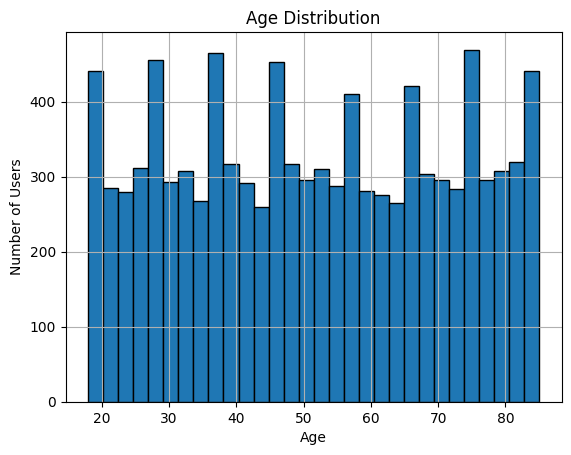

In [ ]:
import matplotlib.pyplot as plt
df['Age'].hist(bins=30, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of Users')
plt.show()

Distribution of Gender

Gender
Female               2530
Male                 2521
Non-Binary           2480
Prefer not to say    2469
Name: count, dtype: int64


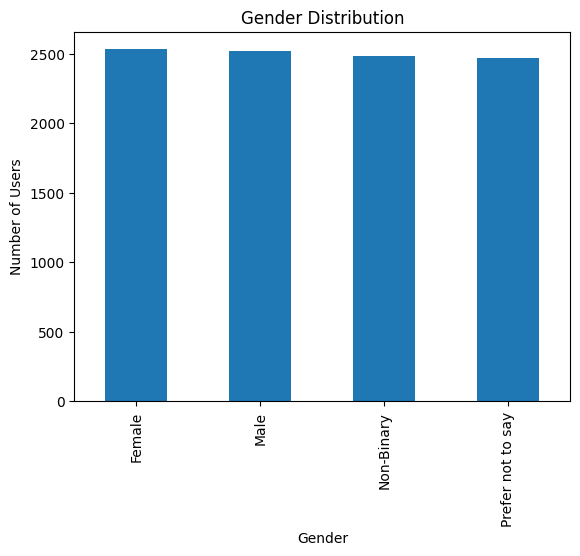

In [ ]:
print(df['Gender'].value_counts())

# Bar chart for Gender distribution
df['Gender'].value_counts().plot(kind='bar')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Number of Users')
plt.show()

Distribution of Nationality

Nationality
Korea            83
Congo            80
Timor-Leste      59
Sweden           58
Togo             54
                 ..
Bhutan           29
Jersey           28
New Caledonia    27
Rwanda           26
Cambodia         24
Name: count, Length: 243, dtype: int64


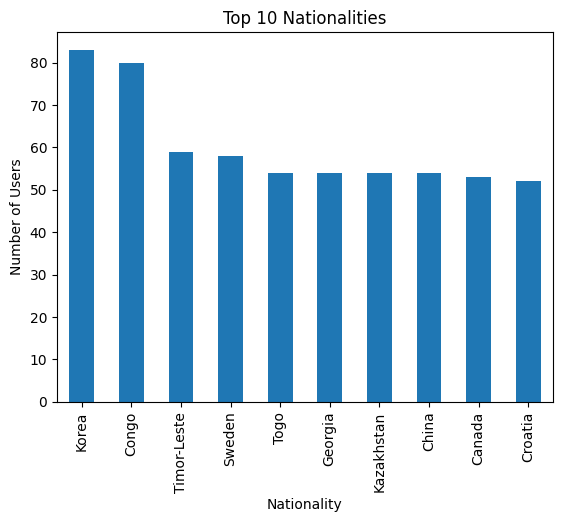

In [ ]:
print(df['Nationality'].value_counts())

# Bar chart for Nationality distribution (consider plotting only the top N nationalities for clarity)
top_n = 10
df['Nationality'].value_counts()[:top_n].plot(kind='bar')
plt.title('Top {} Nationalities'.format(top_n))
plt.xlabel('Nationality')
plt.ylabel('Number of Users')
plt.show()

Distribution of Account Status (Active, Inactive, Suspended)

In [ ]:
print(df['Status'].value_counts())

Status
Active       3356
Suspended    3331
Inactive     3313
Name: count, dtype: int64


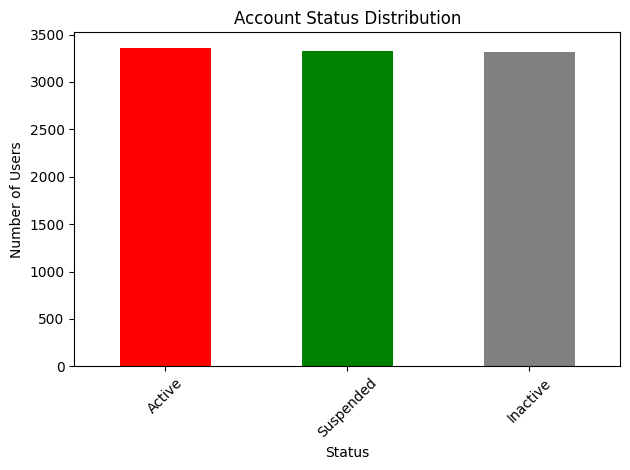

In [ ]:
# Bar chart for Account Status distribution
import matplotlib.pyplot as plt
df['Status'].value_counts().plot(kind='bar', color=['red', 'green', 'grey'])
plt.title('Account Status Distribution')
plt.xlabel('Status')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Distribution of Subscription Types

In [ ]:
print(df['Subscription_Type'].value_counts())

Subscription_Type
Platinum    3380
Basic       3354
Premium     3266
Name: count, dtype: int64


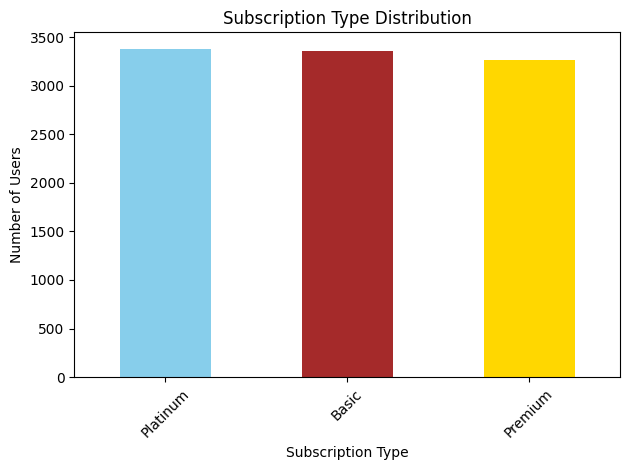

In [ ]:
# Bar chart for Subscription Types distribution
df['Subscription_Type'].value_counts().plot(kind='bar', color=['skyblue','brown','gold'])
plt.title('Subscription Type Distribution')
plt.xlabel('Subscription Type')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Average Account Balance

In [ ]:
avg_balance = df['Account_Balance'].mean()
print(f"Average Account Balance: ${avg_balance:.2f}")

Average Account Balance: $553.22


Total Money Spent by Users

In [ ]:
total_spent = df['Total_Spent'].sum()
print(f"Total Money Spent by Users: ${total_spent:.2f}")

Total Money Spent by Users: $5448136.58


Distribution of Rewards Points

In [ ]:
rewards_stats = df['Rewards_Points'].describe()
print(rewards_stats)

count    10000.00000
mean      2500.95750
std       1440.52545
min          0.00000
25%       1267.75000
50%       2488.50000
75%       3754.00000
max       5000.00000
Name: Rewards_Points, dtype: float64


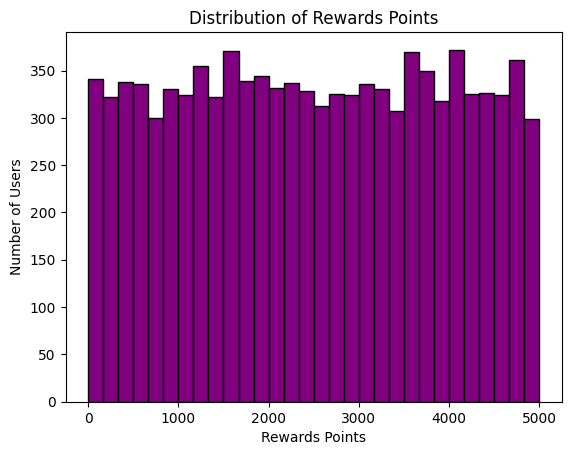

In [ ]:
import matplotlib.pyplot as plt

plt.hist(df['Rewards_Points'], bins=30, color='purple', edgecolor='black')
plt.title('Distribution of Rewards Points')
plt.xlabel('Rewards Points')
plt.ylabel('Number of Users')
plt.show()

Number of Users Who Have Spent Above a Certain Threshold

In [ ]:
threshold = 500
high_spenders = df[df['Total_Spent'] > threshold]
num_high_spenders = len(high_spenders)

print(f"Number of users who have spent more than ${threshold}: {num_high_spenders}")

Number of users who have spent more than $500: 5455


Correlation Between Account Balance and Total Spent

In [ ]:
correlation = df['Account_Balance'].corr(df['Total_Spent'])
print(f"Correlation between Account Balance and Total Spent: {correlation:.2f}")

Correlation between Account Balance and Total Spent: -0.01


Users With the Highest Rewards Points and Their Corresponding Total Expenditure

In [ ]:
top_users = df.sort_values(by='Rewards_Points', ascending=False).head(5)
print(top_users[['Username', 'Rewards_Points', 'Total_Spent']])

                Username  Rewards_Points  Total_Spent
7123            amanda25            5000       359.50
3647  hernandezcatherine            5000       596.60
1414          imaldonado            5000       714.08
7244              lisa62            5000       704.07
1222      hodgesbrittany            4998       664.25


Distribution of Newsletter Subscription

In [ ]:
newsletter_counts = df['Newsletter_Subscription'].value_counts()
print(newsletter_counts)

Newsletter_Subscription
False    5088
True     4912
Name: count, dtype: int64


Distribution of Marketing Preference

In [ ]:
marketing_pref_counts = df['Marketing_Preference'].value_counts()
print(marketing_pref_counts)

Marketing_Preference
Email    3351
SMS      3266
Name: count, dtype: int64


Distribution of Theme Preference

In [ ]:
theme_pref_counts = df['Theme_Preference'].value_counts()
print(theme_pref_counts)

Theme_Preference
Light    5014
Dark     4986
Name: count, dtype: int64


Preferred Language of Users

In [ ]:
language_pref_counts = df['Preferred_Language'].value_counts()
print(language_pref_counts)

Preferred_Language
Chinese    2059
Spanish    2019
French     1984
English    1972
German     1966
Name: count, dtype: int64


Percentage of Users with Two Factor Authentication Enabled

In [ ]:
two_factor_counts = df['Two_Factor_Authentication'].value_counts()
print(two_factor_counts)

Two_Factor_Authentication
False    5027
True     4973
Name: count, dtype: int64


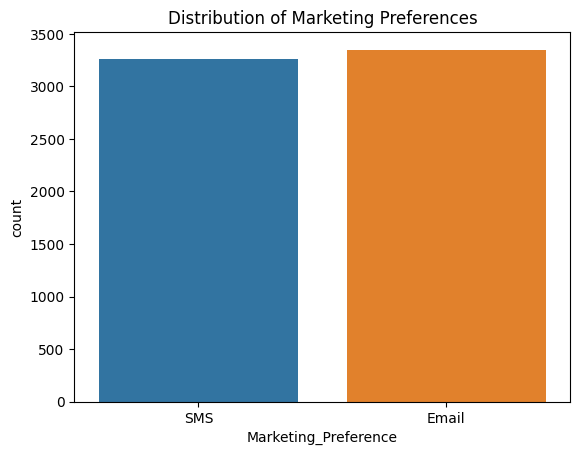

In [ ]:
# Plotting distribution of Marketing Preferences
sns.countplot(data=df, x='Marketing_Preference')
plt.title('Distribution of Marketing Preferences')
plt.show()

Login Behavior

Average Number of Logins

In [ ]:
avg_logins = df['Number_of_Logins'].mean()
print(f"Average Number of Logins: {avg_logins:.2f}")

Average Number of Logins: 50.34


Distribution of Last Login Device

In [ ]:
device_counts = df['Last_Login_Device'].value_counts()
print(device_counts)

Last_Login_Device
Mobile     3403
Desktop    3333
Tablet     3264
Name: count, dtype: int64


Purchasing Behavior

In [ ]:
df['Joined_Date'] = pd.to_datetime(df['Joined_Date'])
df['Last_Purchase_Date'] = pd.to_datetime(df['Last_Purchase_Date'])

df['Time_to_Purchase'] = (df['Last_Purchase_Date'] - df['Joined_Date']).dt.days

# Identify frequent shoppers (e.g., those who made a purchase within a month of joining)
frequent_shoppers = df[df['Time_to_Purchase'] <= 30].shape[0]

# Identify infrequent shoppers (e.g., those who took more than a year to make a purchase)
infrequent_shoppers = df[df['Time_to_Purchase'] > 365].shape[0]

print(f"Frequent Shoppers: {frequent_shoppers}")
print(f"Infrequent Shoppers: {infrequent_shoppers}")

Frequent Shoppers: 1118
Infrequent Shoppers: 6359


Favorite Categories

In [ ]:
favorite_categories = df['Favorite_Category'].value_counts()
print(favorite_categories)

Favorite_Category
Books             2016
Apparel           2010
Electronics       2006
Groceries         1995
Home & Kitchen    1973
Name: count, dtype: int64


Referral System

In [ ]:
users_with_referral = df[df['Referral_Code'].notna() & (df['Referral_Code'] != "")].shape[0]

print(f"Users with a Referral Code: {users_with_referral}")

Users with a Referral Code: 10000


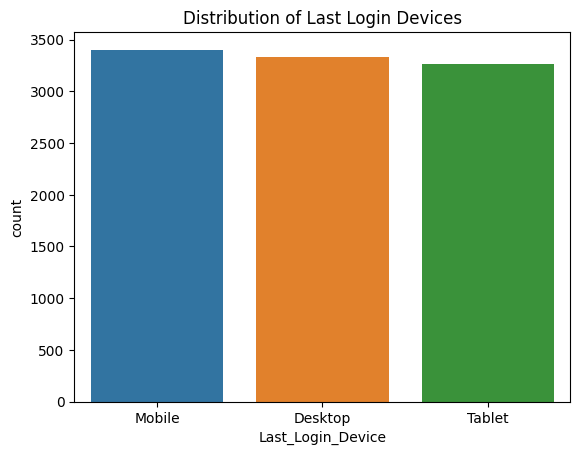

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data=df, x='Last_Login_Device')
plt.title('Distribution of Last Login Devices')
plt.show()

Calculate the Time Difference between Join Date and Last Purchase Date

In [ ]:
df['Joined_Date'] = pd.to_datetime(df['Joined_Date'])
df['Last_Purchase_Date'] = pd.to_datetime(df['Last_Purchase_Date'])

df['Days_Before_Purchase'] = (df['Last_Purchase_Date'] - df['Joined_Date']).dt.days

Identify Frequent and Infrequent Shoppers

In [ ]:
frequent_shoppers = df[df['Days_Before_Purchase'] <= 30].shape[0]
infrequent_shoppers = df[df['Days_Before_Purchase'] > 180].shape[0]

print(f"Frequent Shoppers (purchased within 30 days of joining): {frequent_shoppers}")
print(f"Infrequent Shoppers (took over 180 days to purchase): {infrequent_shoppers}")

Frequent Shoppers (purchased within 30 days of joining): 1118
Infrequent Shoppers (took over 180 days to purchase): 7767


Visualization

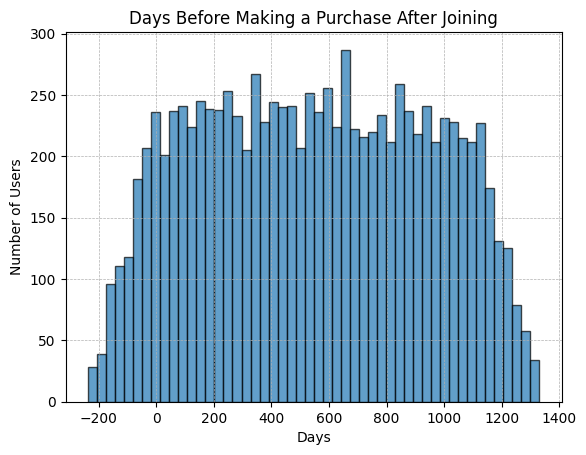

In [ ]:
plt.hist(df['Days_Before_Purchase'], bins=50, edgecolor='k', alpha=0.7)
plt.title('Days Before Making a Purchase After Joining')
plt.xlabel('Days')
plt.ylabel('Number of Users')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

Count Occurrences of Each Category

In [ ]:
category_counts = df['Favorite_Category'].value_counts()
print(category_counts)

Favorite_Category
Books             2016
Apparel           2010
Electronics       2006
Groceries         1995
Home & Kitchen    1973
Name: count, dtype: int64


Visualization

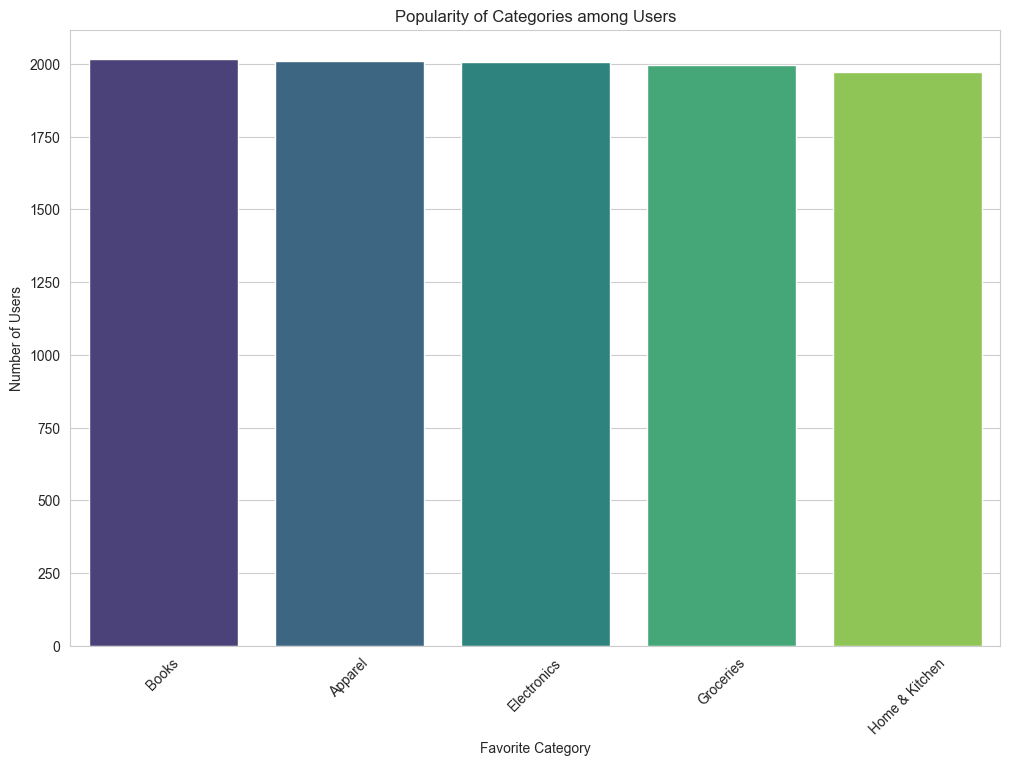

In [ ]:
sns.set_style("whitegrid")

plt.figure(figsize=(12, 8))
sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")
plt.title('Popularity of Categories among Users')
plt.xlabel('Favorite Category')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.show()

Determine Users With Referral Code

In [ ]:
users_with_referral = df[df['Referral_Code'].notnull() & (df['Referral_Code'] != "")].shape[0]
total_users = df.shape[0]
users_without_referral = total_users - users_with_referral
print(f"Number of users with a referral code: {users_with_referral}")
print(f"Number of users without a referral code: {users_without_referral}")

Number of users with a referral code: 10000
Number of users without a referral code: 0


Percentage Calculation

In [ ]:
percentage_with_referral = (users_with_referral / total_users) * 100
print(f"Percentage of users with a referral code: {percentage_with_referral:.2f}%")

Percentage of users with a referral code: 100.00%


User Distribution: Heatmap based on Latitude and Longitude

In [74]:
import pandas as pd
import folium
from folium.plugins import HeatMap

# Read the data
df = pd.read_csv('Okane_net_data.csv')

# Create a basic map
m = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=2)

# List comprehension to make out list of lists
heat_data = [[row['Latitude'], row['Longitude']] for index, row in df.iterrows()]

# Plot it on the map
HeatMap(heat_data).add_to(m)

# Display the map
m.save('heatmap.html')


Cities or States with the Most Users

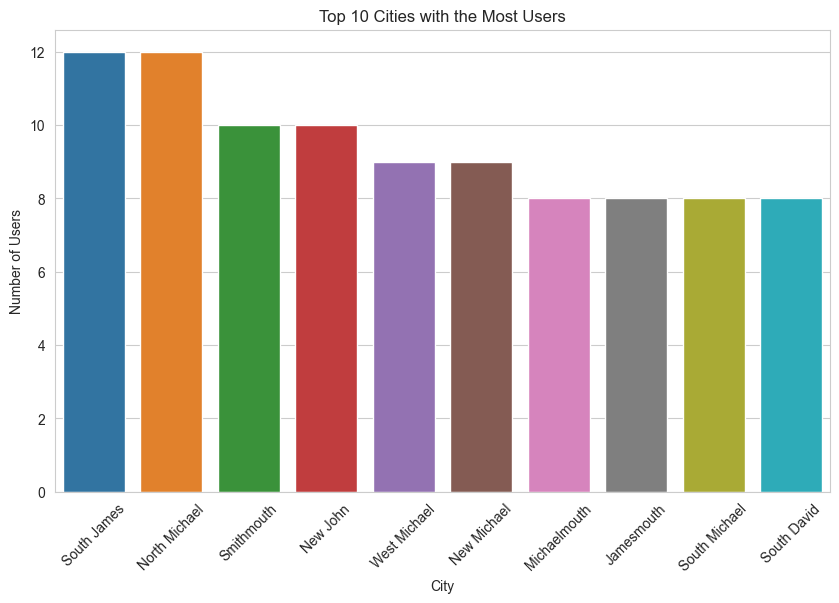

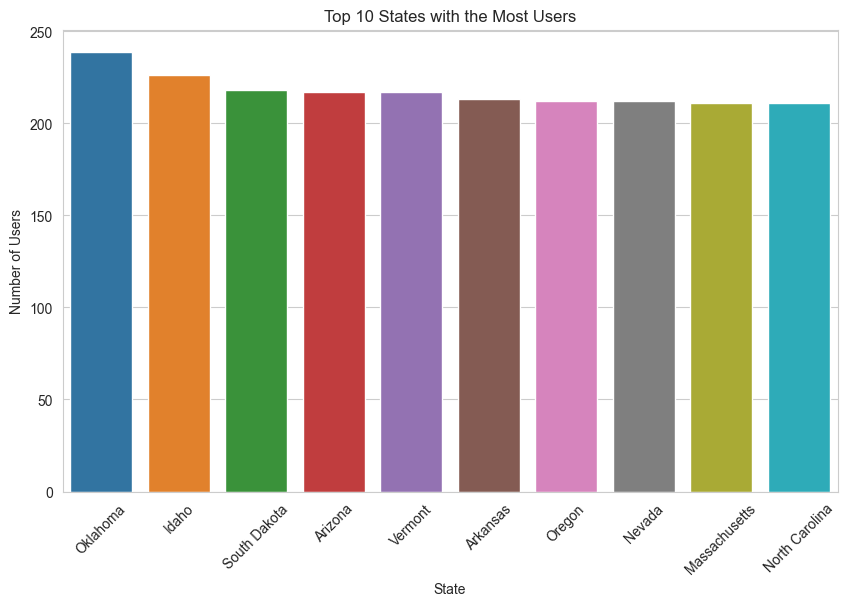

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count users by City
city_counts = df['City'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=city_counts.index, y=city_counts.values)
plt.title('Top 10 Cities with the Most Users')
plt.ylabel('Number of Users')
plt.xlabel('City')
plt.xticks(rotation=45)
plt.show()

# Similarly, for states:
state_counts = df['State'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=state_counts.index, y=state_counts.values)
plt.title('Top 10 States with the Most Users')
plt.ylabel('Number of Users')
plt.xlabel('State')
plt.xticks(rotation=45)
plt.show()

Country Analysis

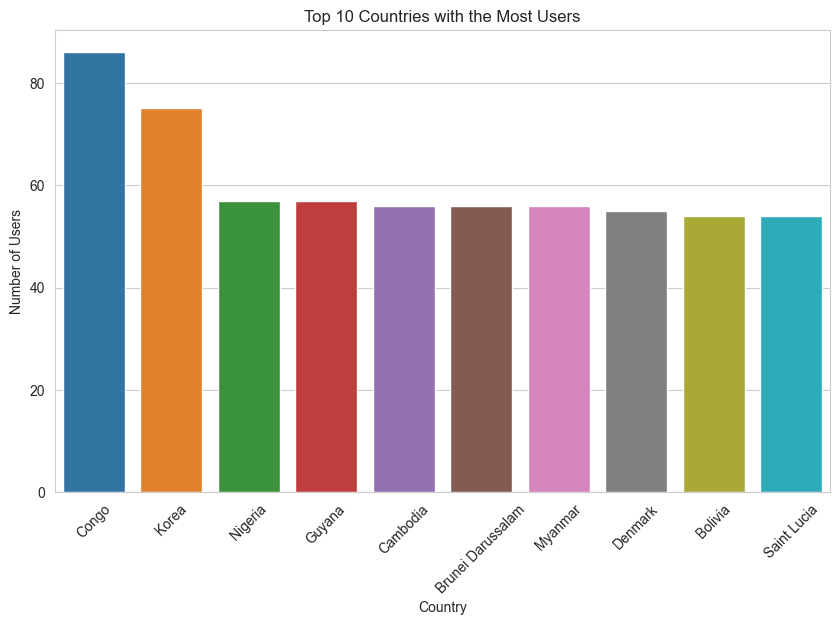

In [76]:
country_counts = df['Country'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=country_counts.index, y=country_counts.values)
plt.title('Top 10 Countries with the Most Users')
plt.ylabel('Number of Users')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.show()

Joining Trend

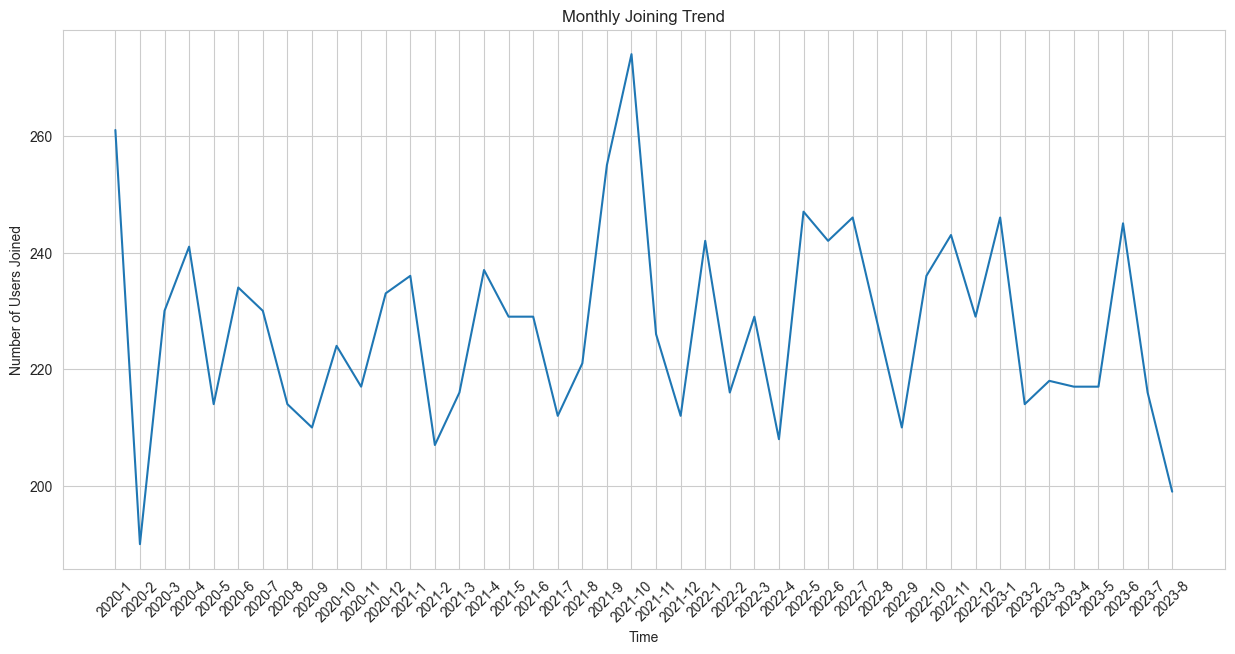

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your data is in a DataFrame named df
# Convert the Joined_Date column to a datetime object
df['Joined_Date'] = pd.to_datetime(df['Joined_Date'])

# Extract year and month
df['Join_Year'] = df['Joined_Date'].dt.year
df['Join_Month'] = df['Joined_Date'].dt.month

# Group by year and month to get counts
join_counts = df.groupby(['Join_Year', 'Join_Month']).size().reset_index(name='Counts')

# Plot
plt.figure(figsize=(15, 7))
sns.lineplot(x=join_counts['Join_Year'].astype(str) + '-' + join_counts['Join_Month'].astype(str), y=join_counts['Counts'])
plt.xticks(rotation=45)
plt.title('Monthly Joining Trend')
plt.ylabel('Number of Users Joined')
plt.xlabel('Time')
plt.show()

Purchase Trend

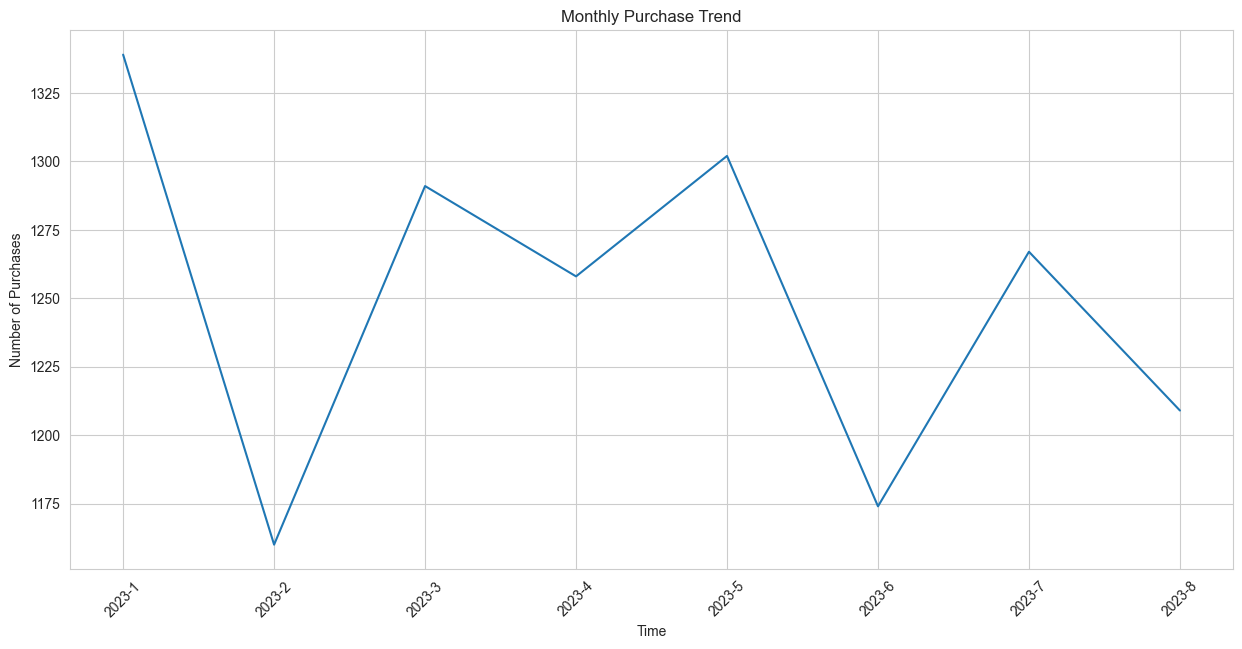

In [78]:
df['Last_Purchase_Date'] = pd.to_datetime(df['Last_Purchase_Date'])
df['Purchase_Year'] = df['Last_Purchase_Date'].dt.year
df['Purchase_Month'] = df['Last_Purchase_Date'].dt.month
purchase_counts = df.groupby(['Purchase_Year', 'Purchase_Month']).size().reset_index(name='Counts')
plt.figure(figsize=(15, 7))
sns.lineplot(x=purchase_counts['Purchase_Year'].astype(str) + '-' + purchase_counts['Purchase_Month'].astype(str), y=purchase_counts['Counts'])
plt.xticks(rotation=45)
plt.title('Monthly Purchase Trend')
plt.ylabel('Number of Purchases')
plt.xlabel('Time')
plt.show()

Spending Behavior

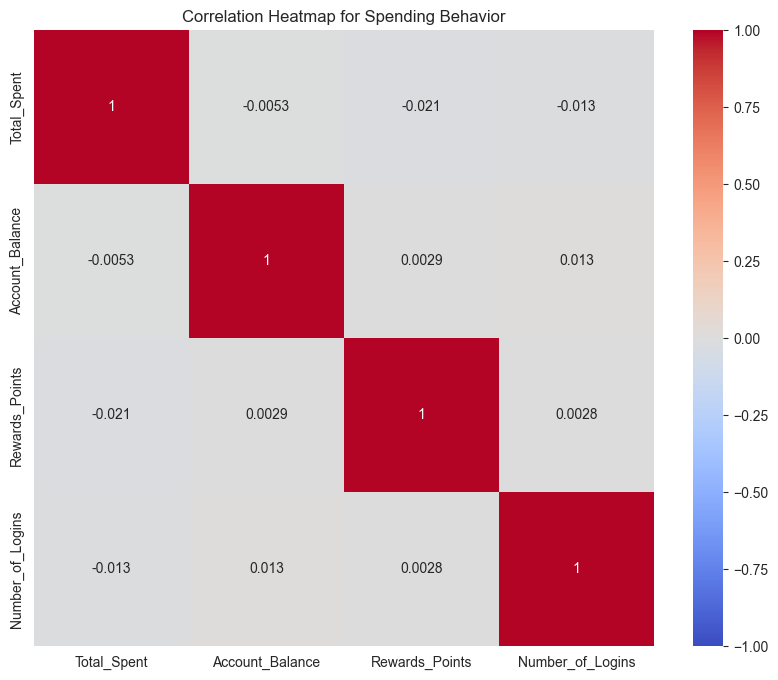

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation_metrics = df[['Total_Spent', 'Account_Balance', 'Rewards_Points', 'Number_of_Logins']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_metrics, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap for Spending Behavior')
plt.show()

Subscription Type vs Spending

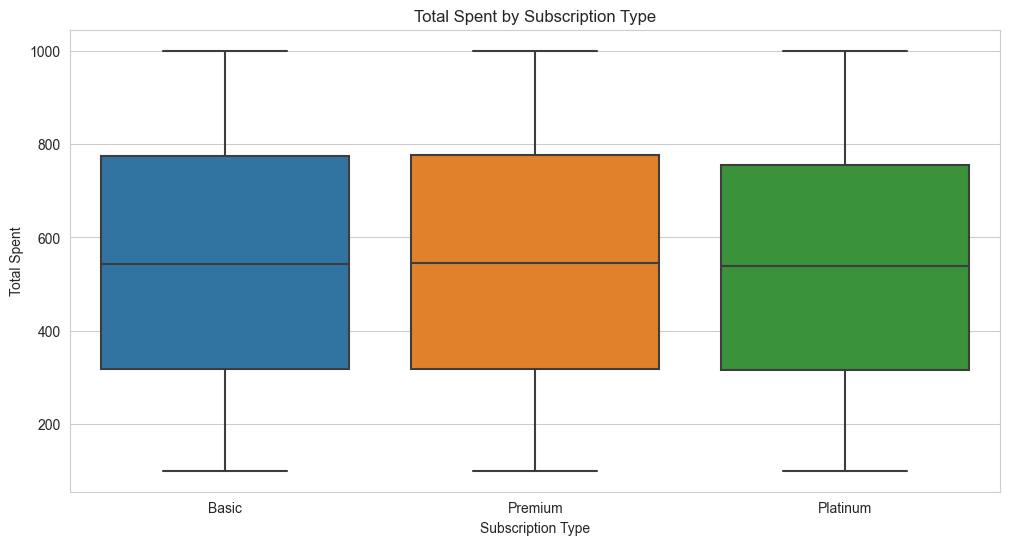

In [80]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Subscription_Type', y='Total_Spent', data=df, order=["Basic", "Premium", "Platinum"])
plt.title('Total Spent by Subscription Type')
plt.ylabel('Total Spent')
plt.xlabel('Subscription Type')
plt.show()

Password Reset

In [83]:
frequent_reset_users = df.sort_values(by='Password_Reset_Count', ascending=False).head(10)
print(frequent_reset_users[['UserID', 'Username', 'Password_Reset_Count']])

                                    UserID         Username  \
6950  9c89fdff-d065-4a3b-a93b-8a5911866606       brianroman   
592   eb6a7238-a0db-4433-b43b-1449d648ab82   nathanielmoran   
8650  7ddff44a-2607-4900-9d48-c987df0bc66c  nelsonelizabeth   
6133  092a76a2-547e-4826-9925-47d1e3f9132c      christian82   
3999  2db25d79-fa81-48af-a0af-f7c58d695e5e        rcastillo   
1235  6dade2e0-f637-474f-817a-81dee1b826b7  daniellewalters   
2927  fcfa26f7-cb66-4cb1-aa4c-baf2945b0fd7         kjackson   
9575  809d80a4-82f7-4b77-a1fd-e253de891114         amanda06   
1232  41463ef2-b196-4acf-a169-5dbe8ad37b22    gregorygraham   
9576  3035cffe-0639-499d-9e2d-95dd83d61a92     nelsonteresa   

      Password_Reset_Count  
6950                    10  
592                     10  
8650                    10  
6133                    10  
3999                    10  
1235                    10  
2927                    10  
9575                    10  
1232                    10  
9576            

Two-Factor Authentication (2FA)

In [84]:
users_with_2FA = df[df['Two_Factor_Authentication'] == True]
print(f"Number of users with 2FA enabled: {len(users_with_2FA)}")

Number of users with 2FA enabled: 4973


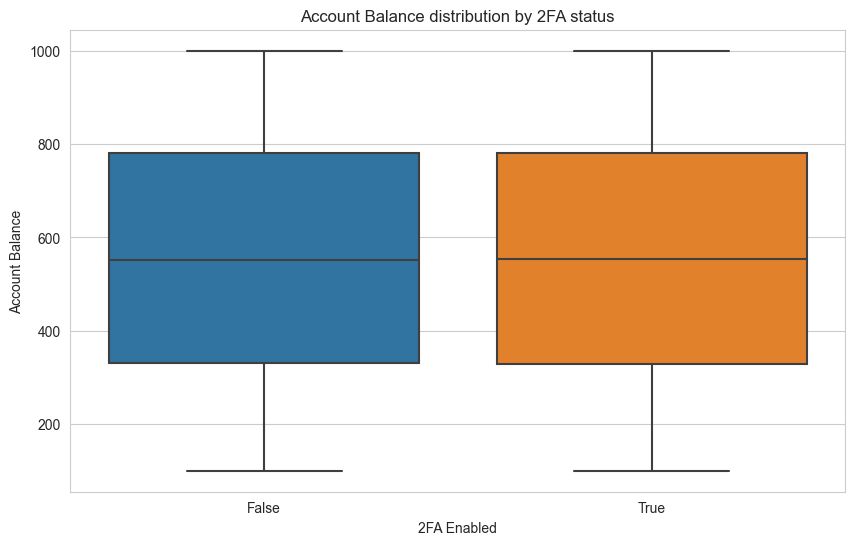

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.boxplot(x='Two_Factor_Authentication', y='Account_Balance', data=df)
plt.title('Account Balance distribution by 2FA status')
plt.ylabel('Account Balance')
plt.xlabel('2FA Enabled')
plt.show()

Profile Completion

In [87]:
correlation_metrics = df[['Profile_Completion_Percentage', 'Number_of_Logins', 'Total_Spent', 'Account_Balance']].corr()
print(correlation_metrics['Profile_Completion_Percentage'])

Profile_Completion_Percentage    1.000000
Number_of_Logins                 0.002767
Total_Spent                     -0.001865
Account_Balance                  0.003959
Name: Profile_Completion_Percentage, dtype: float64


Newsletter Subscription

In [88]:
average_logins_subscribed = df[df['Newsletter_Subscription'] == True]['Number_of_Logins'].mean()
average_logins_not_subscribed = df[df['Newsletter_Subscription'] == False]['Number_of_Logins'].mean()

print(f"Average number of logins for users subscribed to the newsletter: {average_logins_subscribed:.2f}")
print(f"Average number of logins for users not subscribed to the newsletter: {average_logins_not_subscribed:.2f}")

Average number of logins for users subscribed to the newsletter: 50.82
Average number of logins for users not subscribed to the newsletter: 49.87


Correlation with Total Spent

In [89]:
average_spent_subscribed = df[df['Newsletter_Subscription'] == True]['Total_Spent'].mean()
average_spent_not_subscribed = df[df['Newsletter_Subscription'] == False]['Total_Spent'].mean()

print(f"Average total spent by users subscribed to the newsletter: ${average_spent_subscribed:.2f}")
print(f"Average total spent by users not subscribed to the newsletter: ${average_spent_not_subscribed:.2f}")

Average total spent by users subscribed to the newsletter: $547.82
Average total spent by users not subscribed to the newsletter: $541.91


In [93]:
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
import xgboost as xgb

# Load the data
data = pd.read_csv('Okane_net_data.csv')

# Feature Engineering

# Convert dates to datetime format
data['Last_Purchase_Date'] = pd.to_datetime(data['Last_Purchase_Date'])
data['Joined_Date'] = pd.to_datetime(data['Joined_Date'])

# Calculate time since last purchase
data['Days_Since_Last_Purchase'] = (datetime.now() - data['Last_Purchase_Date']).dt.days

# Calculate average time between purchases
data['Average_Days_Between_Purchases'] = data['Days_Since_Last_Purchase'] / data['Number_of_Logins']

# We can include 'Account_Balance' and 'Number_of_Logins' directly as features

# Labeling
# For instance, if a user hasn't made a purchase in the last 180 days, mark them as churned
data['Churned'] = np.where(data['Days_Since_Last_Purchase'] > 180, 1, 0)

# Features and target
X = data[['Days_Since_Last_Purchase', 'Average_Days_Between_Purchases', 'Account_Balance', 'Number_of_Logins']]
y = data['Churned']

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Selection: For demonstration, let's use RandomForest. You can swap this with other models for comparison.
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"ROC-AUC: {roc_auc}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

Accuracy: 1.0
ROC-AUC: 1.0
Precision: 1.0
Recall: 1.0
